# 01.Importing libraries

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [5]:
# Importing the latest dataset
df = pd.read_pickle(r'/Users/user/Documents/Data analysis/E4_Python/Instacart Basket Analysis/2 Data/Prepared Data/Orders_products_all.pkl')

# 03. Excluding Personally Identifiable Information

In [7]:
# Making a list of all the columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'exists', 'price_range', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spending', 'spending_flag', 'median_interval',
       'interval_flag', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'overlap'],
      dtype='object')

In [8]:
# Dropping PII columns containing Name and Surname of customers
df1=df.drop(columns = ['First Name', 'Surname'])

In [9]:
# Cheking that remaining data does not include any PII
df1.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'exists', 'price_range', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spending', 'spending_flag', 'median_interval',
       'interval_flag', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'overlap'],
      dtype='object')

# 04. Relation between US regions and spending habits

In [11]:
# Grouping states into US regions
outcome = []
for value in df1['STATE']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        outcome.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        outcome.append('Midwest')    
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        outcome.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        outcome.append('West')
    else: outcome.append('Missing value')

In [12]:
# Assining the new data to a column in the main dataframe
df1['Regional_division'] = outcome

In [13]:
# Checking that all states were successfully assigned to a region
df1['Regional_division'].value_counts(dropna=False)

Regional_division
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [14]:
# Determining whether there's a difference between spending habbits in different regions
reg_spend = pd.crosstab(df1['Regional_division'], df1['spending_flag'], dropna = False)

<Axes: xlabel='Regional_division'>

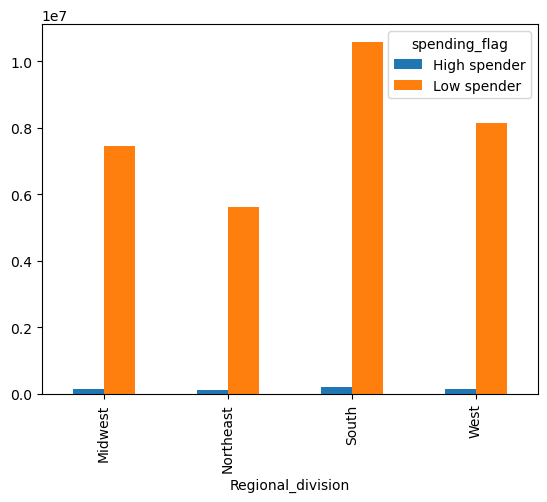

In [15]:
reg_spend.plot.bar()

# 05. Excluding extreemely low spending customers

In [17]:
# Creating a column identyfing extreemely low spending customers
df1.loc[df1['max_order'] <5, 'exclusion_flag'] = 'Exclude'
df1.loc[df1['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [18]:
# Checking how many customers will be excluded
df1['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [19]:
# Creating a new dataset without low spending customers
df2 = df1.loc[df1['exclusion_flag'].isin(['Keep'])]

In [20]:
# Checking whether the new dataset does not contain low spending customers
df2['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
Keep    30964564
Name: count, dtype: int64

In [21]:
#Exporting excluded data
ex = df1.loc[df1['exclusion_flag'].isin(['Exclude'])]
ex.to_pickle(os.path.join(r'/Users/user/Documents/Data analysis/E4_Python/Instacart Basket Analysis/2 Data/Prepared Data/excluded_low_spenders.pkl'))

# 06. Limiting focus of analysis by excluding irrelevant columns

In [23]:
# Excluding irrelevant columns
df3=df2.drop(columns = ['order_id', 'product_id', 'add_to_cart_order', '_merge', 'product_name', 'aisle_id', 'exists', 'price_range_loc', 'busiest_day', 'exclusion_flag', 'STATE', 'date_joined', 'overlap'])

In [24]:
df3.shape

(30964564, 23)

# 07. Creating new variables: age-range, family size, and income-range

AGE

In [27]:
# Finding the range of customer ages
df3['Age'].agg(['min', 'max'])

min    18
max    81
Name: Age, dtype: int64

In [28]:
# Dividing customers into three age groups: young, middle age, and old age
df3.loc[df3['Age'] <30, 'age_range'] = '1 Young'
df3.loc[(df3['Age'] >=30)&(df3['Age']<60), 'age_range'] = '2 Middle age'
df3.loc[df3['Age'] >= 60, 'age_range'] = '3 Old'

In [29]:
# Checking how many customers are in each age group
df3['age_range'].value_counts(dropna= False)

age_range
2 Middle age    14572457
3 Old           10574504
1 Young          5817603
Name: count, dtype: int64

FAMILY SIZE

In [31]:
#Dividing customers into three groups: 0 children, 1 one child, 2 multiple children
df3.loc[df3['n_dependants'] == 0, 'Family_size'] = '0 dependants'
df3.loc[df3['n_dependants'] == 1, 'Family_size'] = '1 one dependant'
df3.loc[df3['n_dependants'] >= 2, 'Family_size'] = '2 multiple dependants'

In [32]:
# Checking how many customers are in each parenthood group
df3['Family_size'].value_counts(dropna= False)

Family_size
2 multiple dependants    15505777
0 dependants              7739681
1 one dependant           7719106
Name: count, dtype: int64

INCOME

In [34]:
# Finding the range of income
df3['income'].agg(['min', 'max'])

min     25903
max    593901
Name: income, dtype: int64

In [35]:
# Dividing customers into three income groups: small, middle, and large
df3.loc[df3['income'] <50000, 'income_range'] = '1 Small'
df3.loc[(df3['income'] >=50000)&(df3['income']<100000), 'income_range'] = '2 Middle'
df3.loc[(df3['income'] >=100000)&(df3['income']<150000), 'income_range'] = '3 Large'
df3.loc[df3['income'] >= 150000, 'income_range'] = '4 Wealthy'


In [36]:
# Checking how many customers are in each income group
df3['income_range'].value_counts(dropna= False)

income_range
2 Middle     13394608
3 Large      10312127
4 Wealthy     3895275
1 Small       3362554
Name: count, dtype: int64

# 08. Exploring which variables best show differences between customers

REGIONS (no differences)

In [39]:
# Checking whether some US regions have different family structures
reg1 = pd.crosstab(df3['Regional_division'], df3['Family_size'], dropna = False)

<Axes: xlabel='Regional_division'>

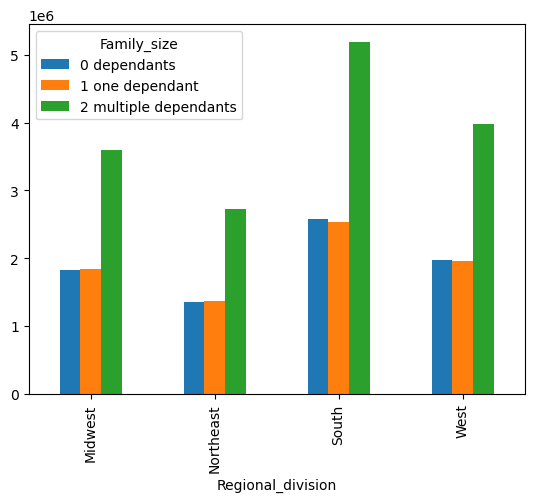

In [40]:
# No big differences between regions in terms of family size
reg1.plot.bar()

In [41]:
# Checking whether some regions have different ratio between low earning customers and high earning customers
reg2=pd.crosstab(df3['Regional_division'], df3['income_range'], dropna = False)

<Axes: xlabel='Regional_division'>

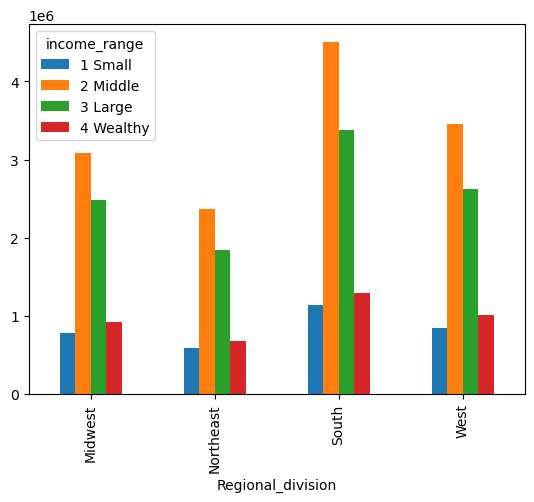

In [42]:
# No big differnces between regions in terms of income ranges
reg2.plot.bar()

GENDER (no differences)

In [44]:
# Checking whether gender has impact on family status
gen1=pd.crosstab(df3['Gender'], df3['fam_status'], dropna = False)

<Axes: xlabel='Gender'>

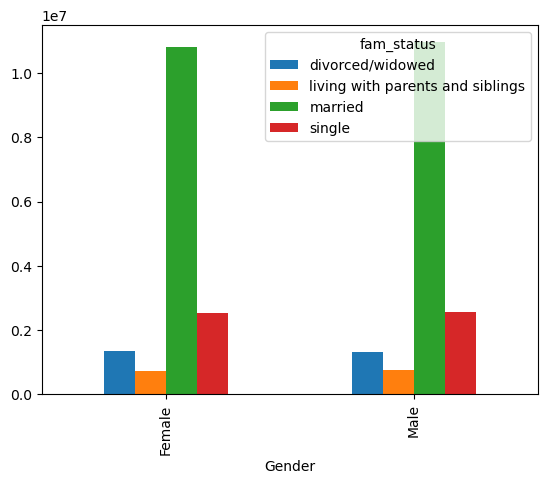

In [45]:
# No difference between genders in terms of family status
gen1.plot.bar()

In [46]:
# Checking whether gender has impact on income
gen2=pd.crosstab(df3['Gender'], df3['income_range'], dropna = False)

<Axes: xlabel='Gender'>

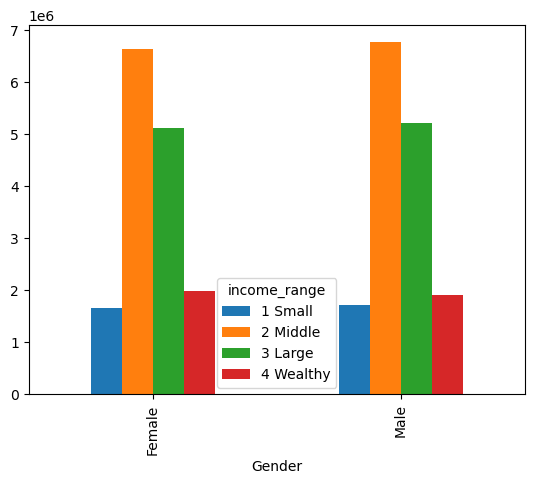

In [47]:
# No difference between genders in terms of income
gen2.plot.bar()

FAMILY SIZE (no differences)

In [49]:
# Checking whether theres a link between family size and income
size1=pd.crosstab(df3['Family_size'], df3['income_range'], dropna = False)

<Axes: xlabel='Family_size'>

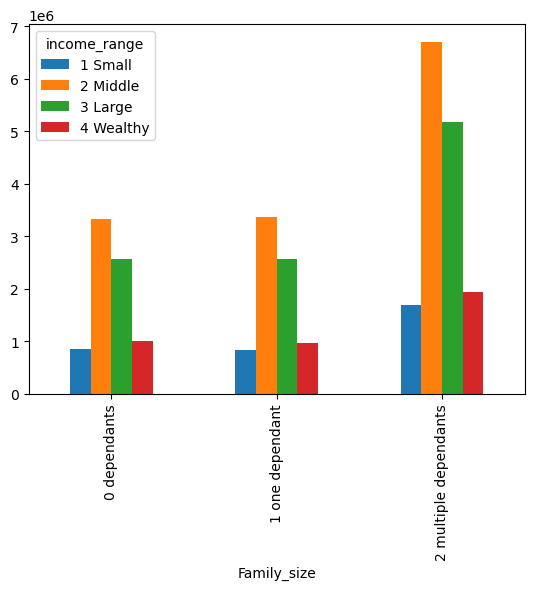

In [50]:
# No difference between family size in terms of income
size1.plot.bar()

In [51]:
# Checking whether theres a link between family size and age
size2=pd.crosstab(df3['Family_size'], df3['age_range'], dropna = False)

<Axes: xlabel='Family_size'>

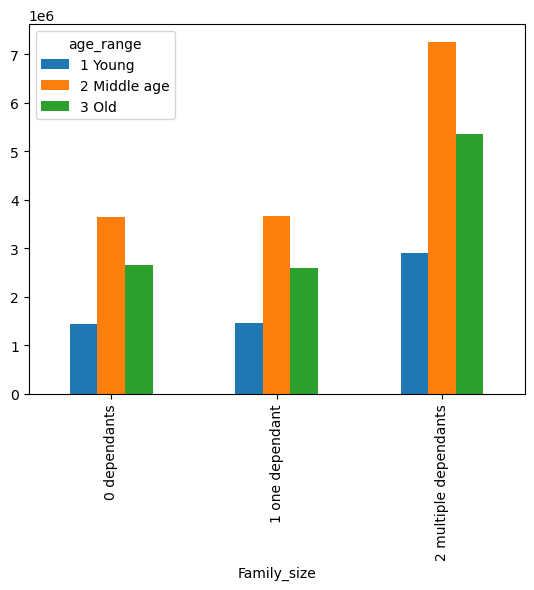

In [52]:
# No difference between family size in terms of ages
size2.plot.bar()

FAMILY STATUS (important differences)

In [54]:
# Checking whether theres a link between family status and income
fam1=pd.crosstab(df3['fam_status'], df3['income_range'], dropna = False)

<Axes: xlabel='fam_status'>

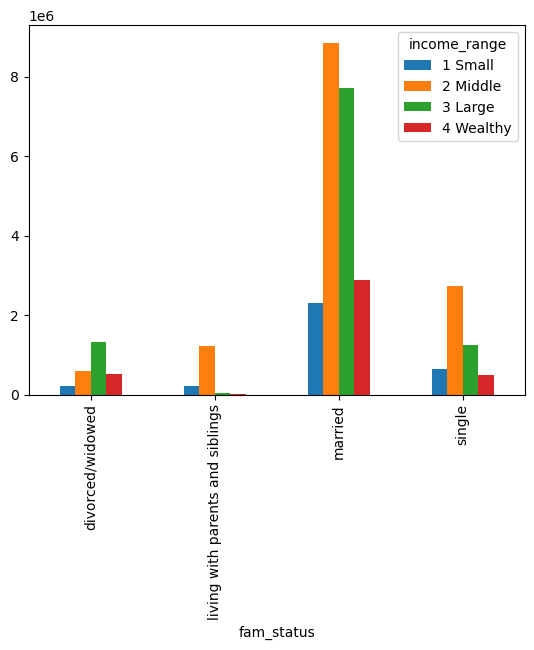

In [55]:
# This variable will be used in future analysis, as there are differences between groups
fam1.plot.bar()

In [56]:
# Checking whether theres a link between family status and age
fam2=pd.crosstab(df3['fam_status'], df3['age_range'], dropna = False)

<Axes: xlabel='fam_status'>

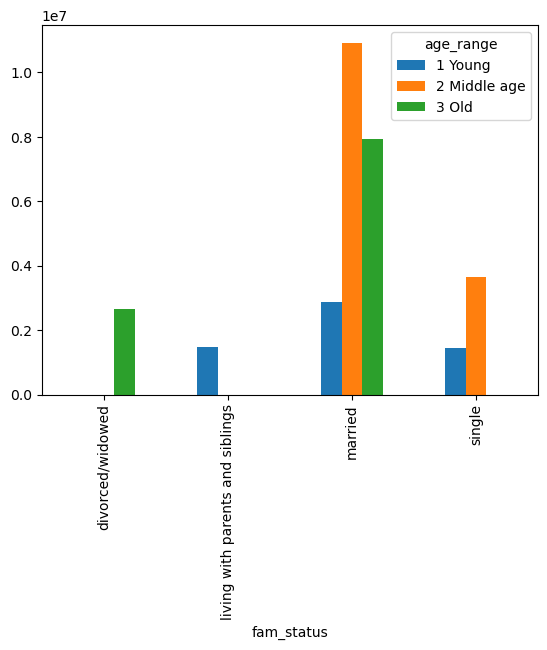

In [57]:
# This variable will be used in future analysis, as there are differences between groups
fam2.plot.bar()

# 09. Creating customer profiles based on family status and age

In [59]:
# Combining customer age and family status into a profile
conditions = [
    (df3['age_range'].isin(['1 Young'])) & (df3['fam_status'].isin(['single']))
    , (df3['age_range'].isin(['2 Middle age'])) & (df3['fam_status'].isin(['single']))
    , (df3['age_range'].isin(['3 Old'])) & (df3['fam_status'].isin(['single']))
    , (df3['age_range'].isin(['1 Young'])) & (df3['fam_status'].isin(['married']))
    , (df3['age_range'].isin(['2 Middle age'])) & (df3['fam_status'].isin(['married']))
    , (df3['age_range'].isin(['3 Old'])) & (df3['fam_status'].isin(['married']))
    , (df3['age_range'].isin(['1 Young'])) & (df3['fam_status'].isin(['divorced/widowed']))
    , (df3['age_range'].isin(['2 Middle age'])) & (df3['fam_status'].isin(['divorced/widowed']))
    , (df3['age_range'].isin(['3 Old'])) & (df3['fam_status'].isin(['divorced/widowed']))
    , (df3['age_range'].isin(['1 Young'])) & (df3['fam_status'].isin(['living with parents and siblings']))
    , (df3['age_range'].isin(['2 Middle age'])) & (df3['fam_status'].isin(['living with parents and siblings']))
    , (df3['age_range'].isin(['3 Old'])) & (df3['fam_status'].isin(['living with parents and siblings']))
]
choices = [
    'Young single'
    , 'Middle-age single'
    , 'Old single'
    , 'Young married'
    , 'Middle-age married'
    , 'Old married' 
    , 'Young divorced/widowed'
    , 'Middle-age divorced/widowed'
    , 'Old divorced/widowed'
    , 'Young living with parents'
    , 'Middle-age living with parents'
    , 'Old living with parents'
]
df3['profile'] = np.select(conditions, choices, 'ERROR')

<Axes: xlabel='profile'>

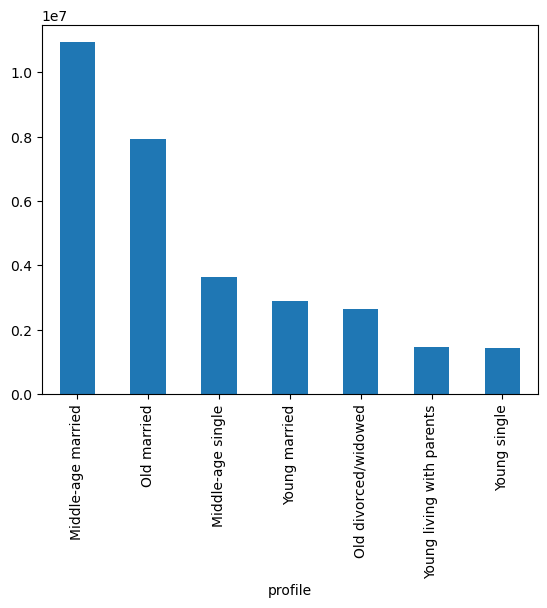

In [60]:
# Checking Profile distribution
df3['profile'].value_counts().plot.bar()

# 10. Exploring customer profiles: income, loyalty, and reordering

INCOME

In [63]:
# Checking income differences between profiles
prof1 = pd.crosstab(df3['profile'], df3['income_range'], dropna = False)

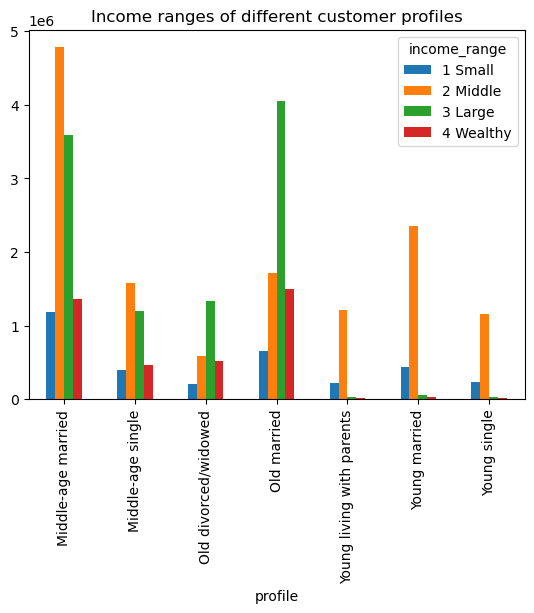

In [64]:
# All young customers earn less, whilst marries middle age and old customers have the most spending power.
f_prof1 =prof1.plot.bar(title='Income ranges of different customer profiles')

LOYALTY

In [66]:
# Checking loyalty differences between profiles
prof2 = pd.crosstab(df3['profile'], df3['loyalty_flag'], dropna = False)

<Axes: title={'center': 'Loyalty of different customer profiles'}, xlabel='profile'>

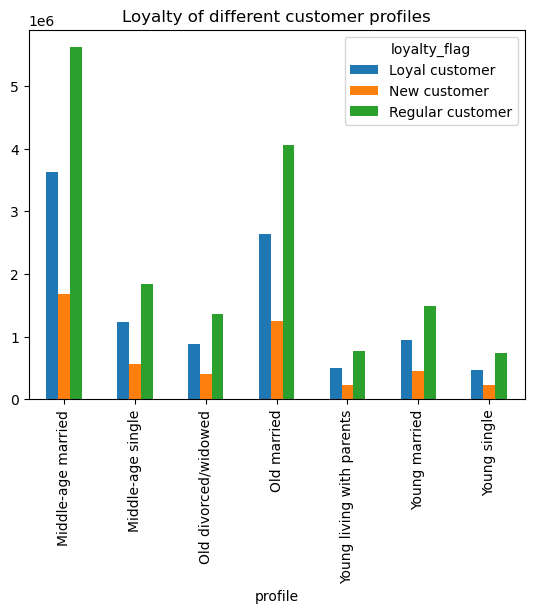

In [67]:
#There seems no differences in terms of loyalty
prof2.plot.bar(title='Loyalty of different customer profiles')

REORDERING

In [69]:
# Checking reordering between profiles
prof4 = pd.crosstab(df3['profile'], df3['reordered'], dropna = False)

<Axes: title={'center': 'Reordering in different customer profiles'}, xlabel='profile'>

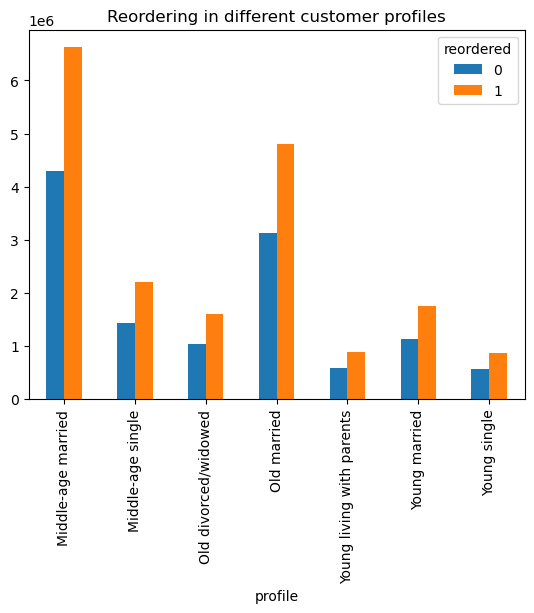

In [70]:
#There seems to be no difference in terms of reordering
prof4.plot.bar(title='Reordering in different customer profiles')

# 11. Descriptive statistics of customer profiles: expenditure and frequency of shopping

SPENDING

In [73]:
# Calculating averge, minimum, and maximum spending for each profile
prof5 = df3.groupby('profile').agg({'avg_spending': ['mean', 'min', 'max']})

In [74]:
# Although older people have more money and have higher maximum amounts spent, on average young married and single people spend the most
prof5

avg_spending                        
                                  mean       min           max
profile                                                       
Middle-age married           11.863409  1.000000   6983.593023
Middle-age single            12.326796  1.000000  15006.940000
Old divorced/widowed         11.532741  1.308333  14042.512281
Old married                  11.788405  1.262500   7414.485185
Young living with parents    10.890167  2.133333  10209.987755
Young married                12.678813  1.628571   4924.385246
Young single                 12.579438  2.100000   8794.882427

FREQUENCY OF SHOPPING

In [76]:
# Calculating averge, minimum, and maximum frequency of shopping for each profile
prof6 = df3.groupby('profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [77]:
# Young single adults shop the most often
prof6

days_since_prior_order           
                                            mean  min   max
profile                                                    
Middle-age married                     10.829788  0.0  30.0
Middle-age single                      10.771922  0.0  30.0
Old divorced/widowed                   10.750328  0.0  30.0
Old married                            10.817469  0.0  30.0
Young living with parents              10.750995  0.0  30.0
Young married                          10.796514  0.0  30.0
Young single                           10.918571  0.0  30.0

# 12. Customer profiles across regions and departments

REGIONS

In [80]:
# Checking regional differences between profiles
prof7 = pd.crosstab(df3['profile'], df3['Regional_division'], dropna = False)

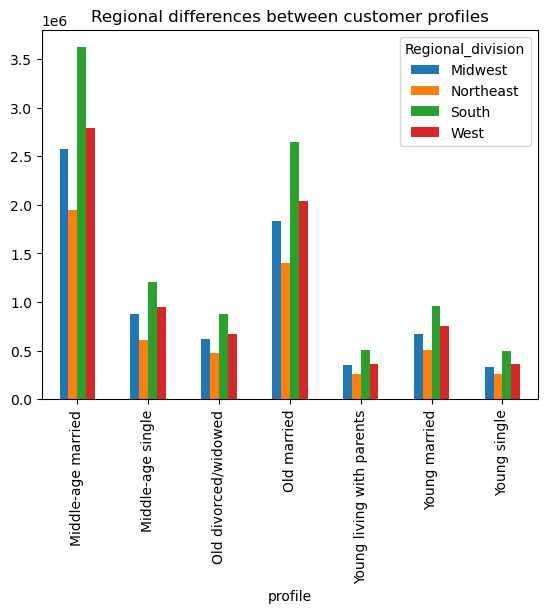

In [81]:
f_prof7 =prof7.plot.bar(title='Regional differences between customer profiles')

DEPARTMENTS: ALCOHOL

In [83]:
#creating a subset for alcohol use
df3_alcohol = df3.loc[df3['department_id'] == 5]

In [84]:
# Retrieving descriptive statistics of alcohol use among different customer profiles
prof9 = df3_alcohol.groupby('profile').agg({'avg_spending': ['mean', 'min', 'max']})

In [85]:
# Old married people spend the most money on average, but old divorced/widowed have highest peaks
prof9

avg_spending                        
                                  mean       min           max
profile                                                       
Middle-age married           23.332639  2.046154   2569.707692
Middle-age single            23.798590  3.337500   3369.248739
Old divorced/widowed         33.864201  4.363636  14042.512281
Old married                  40.799341  3.120000   3695.987705
Young living with parents    13.501279  3.270588    684.971591
Young married                20.011323  3.963636   3683.847794
Young single                 23.972361  3.350000   1717.904274

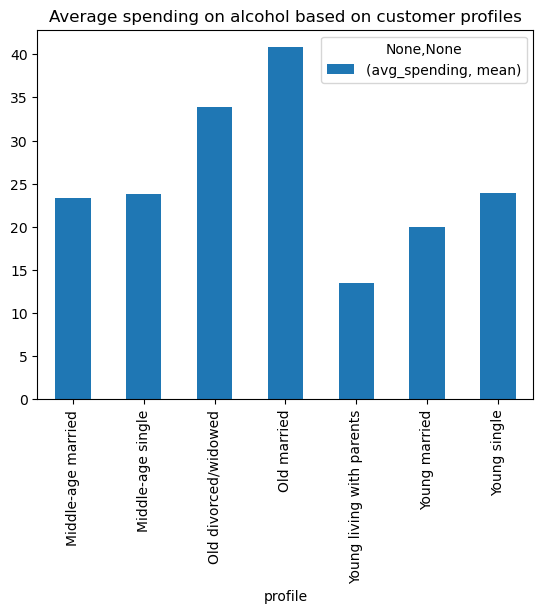

In [86]:
f_prof9 =df3_alcohol.groupby('profile').agg({'avg_spending': ['mean']}).plot.bar(title='Average spending on alcohol based on customer profiles')

DEPARTMENTS: BABIES

In [88]:
#creating a subset for alcohol use
df3_babies = df3.loc[df3['department_id'] == 18]

In [89]:
# Retrieving descriptive statistics for baby item purchases among different customer profiles
prof10 = df3_babies.groupby('profile').agg({'avg_spending': ['mean', 'min', 'max']})

In [90]:
# Hard to explain the result: Old married people spend most on baby products
prof10

avg_spending                       
                                  mean       min          max
profile                                                      
Middle-age married            9.898334  3.594737  3235.009677
Middle-age single             9.451764  4.065217  4357.073913
Old divorced/widowed          8.849657  3.416667  1256.909677
Old married                  11.644978  1.425000  2410.696774
Young living with parents     8.949940  3.753846   486.226316
Young married                10.992168  4.559091  3683.847794
Young single                  8.646095  5.217544  1119.304444

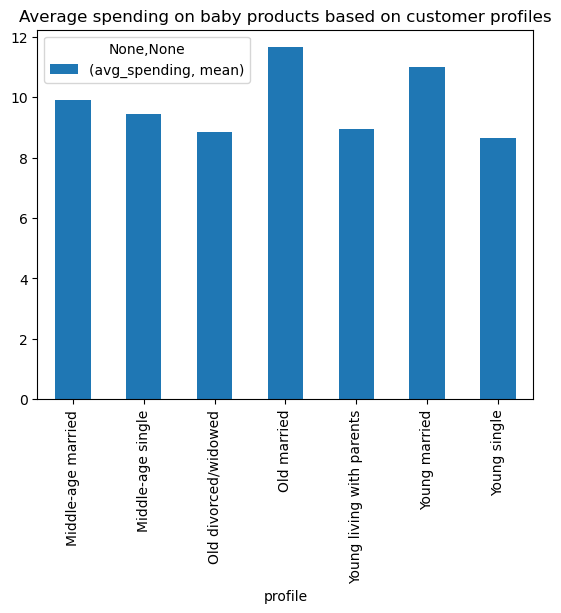

In [91]:
f_prof10 = df3_babies.groupby('profile').agg({'avg_spending': ['mean']}).plot.bar(title='Average spending on baby products based on customer profiles')

# 13. Customer profiles across different times of day

In [93]:
timeliness = df3[['time_of_order', 'avg_spending', 'profile']]

In [94]:
t_young_single = timeliness.loc[timeliness['profile'] == 'Young single']

In [95]:
t_young_parents = timeliness.loc[timeliness['profile'] == 'Young living with parents']

In [96]:
t_old_married = timeliness.loc[timeliness['profile'] == 'Old married']

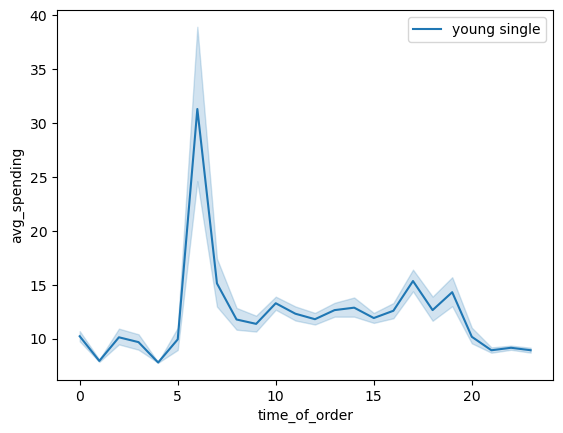

In [97]:
prof1_tod = sns.lineplot(data = t_young_single, x='time_of_order', y='avg_spending', label='young single')

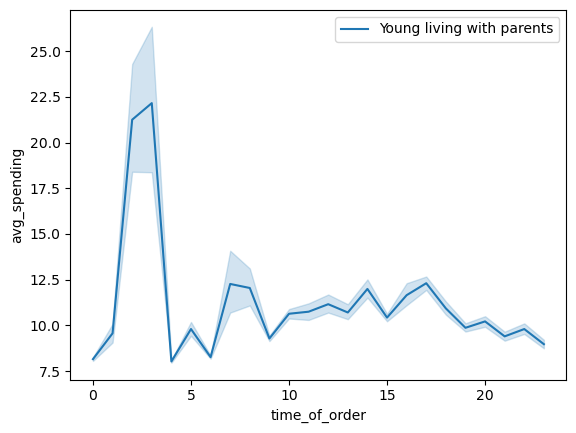

In [98]:
prof2_tod = sns.lineplot(data = t_young_parents, x='time_of_order', y='avg_spending', label='Young living with parents')

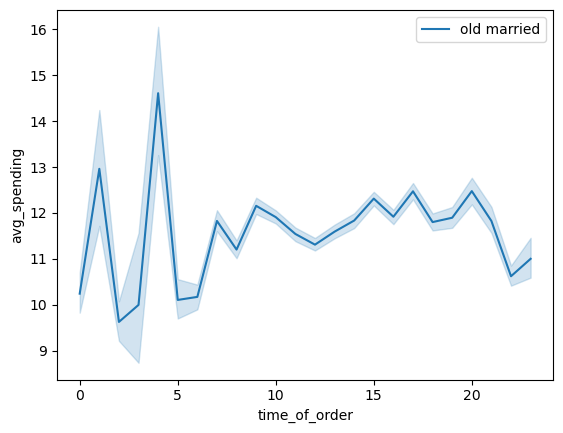

In [99]:
prof3_tod = sns.lineplot(data = t_old_married, x='time_of_order', y='avg_spending', label='old married')

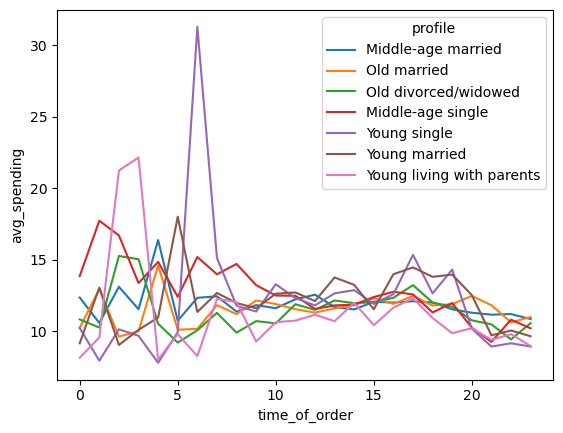

In [100]:
prof_tod = sns.lineplot(data=timeliness, x='time_of_order', y='avg_spending', hue='profile', errorbar=None)

# 14. Overall questions about customer behaviour

DEPARTMENTS

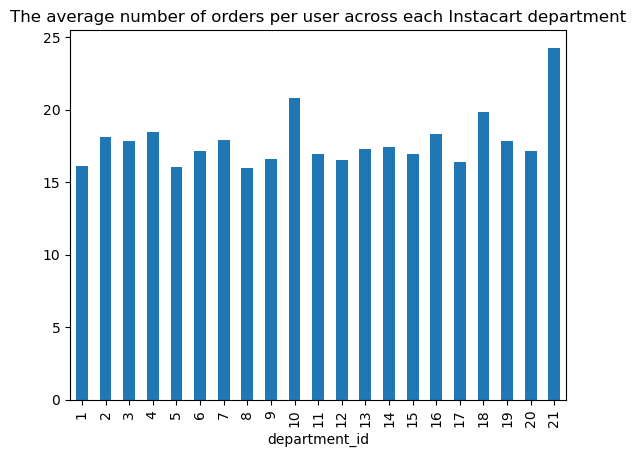

In [103]:
# The average number of orders per user across each Instacart department 
dep = df3.groupby('department_id')['order_number'].mean().plot.bar(title='The average number of orders per user across each Instacart department')

DAY OF WEEK

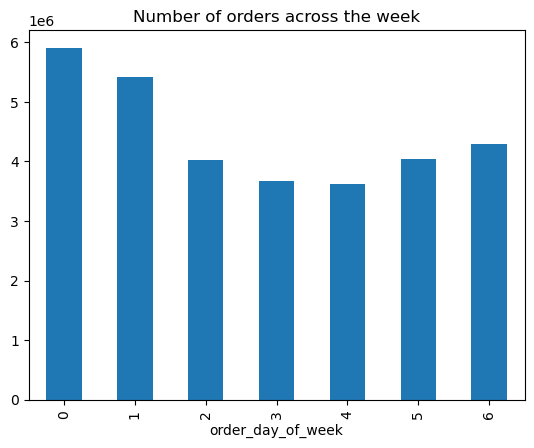

In [105]:
dow = df3['order_day_of_week'].value_counts().sort_index().plot.bar(title='Number of orders across the week')

TIME OF DAY

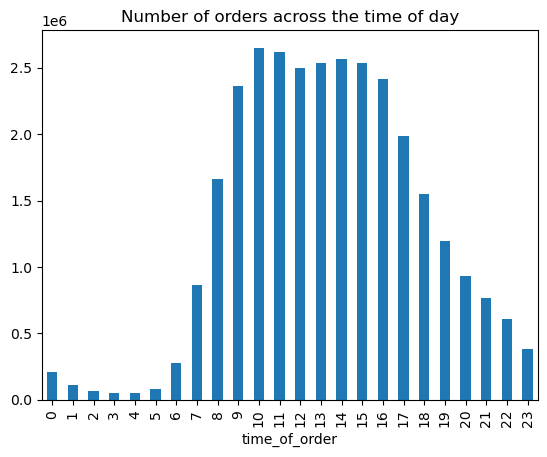

In [107]:
tod = df3['time_of_order'].value_counts().sort_index().plot.bar(title='Number of orders across the time of day')

# 15. Exporting data

In [109]:
df3.to_pickle(os.path.join(r'/Users/user/Documents/Data analysis/E4_Python/Instacart Basket Analysis/2 Data/Prepared Data/final_dataset.pkl'))